In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
#from utility import review_to_words
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


#def data_load(file = 'train_E6oV3lV.csv', test_split: float = 0.1, random_seed: int = 3):
df = pd.read_csv('train_E6oV3lV.csv')
df = df.drop(['id'], axis=1)
#X = df['tweet']
#y = df['label']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
#train_X, train_y = shuffle(X_train, y_train)
#test_X, test_y = shuffle(X_test, y_test)
#train_X = train_X.apply(lambda x:review_to_words(x))

In [2]:
df.head(4)

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...


In [3]:
df.shape

(31962, 2)

In [4]:
df['label'].unique()

array([0, 1], dtype=int64)

In [5]:
#print the train and test tweet
#print(train_X[1])
#print(train_y[1])

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *

import re
from bs4 import BeautifulSoup

def review_to_words(review):
    nltk.download("stopwords", quiet=True)
    stemmer = PorterStemmer()
    
    text = BeautifulSoup(review, "html.parser").get_text() # Remove HTML tags
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower()) # Convert to lower case
    words = text.split() # Split string into words
    words = [w for w in words if w not in stopwords.words("english")] # Remove stopwords
    words = [PorterStemmer().stem(w) for w in words] # stem
    
    return words

In [7]:
#try apply for one of the tweets
df['new'] = df['tweet'].apply(review_to_words)
print(df)

C:\Users\Dell\AppData\Local\Temp\ipykernel_10596\2137687332.py:12: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(review, "html.parser").get_text() # Remove HTML tags


       label                                              tweet  \
0          0   @user when a father is dysfunctional and is s...   
1          0  @user @user thanks for #lyft credit i can't us...   
2          0                                bihday your majesty   
3          0  #model   i love u take with u all the time in ...   
4          0             factsguide: society now    #motivation   
...      ...                                                ...   
31957      0  ate @user isz that youuu?ðððððð...   
31958      0    to see nina turner on the airwaves trying to...   
31959      0  listening to sad songs on a monday morning otw...   
31960      1  @user #sikh #temple vandalised in in #calgary,...   
31961      0                   thank you @user for you follow     

                                                     new  
0      [user, father, dysfunct, selfish, drag, kid, d...  
1      [user, user, thank, lyft, credit, use, caus, o...  
2                 

In [11]:
df['new']

0        [user, father, dysfunct, selfish, drag, kid, d...
1        [user, user, thank, lyft, credit, use, caus, o...
2                                        [bihday, majesti]
3                      [model, love, u, take, u, time, ur]
4                              [factsguid, societi, motiv]
                               ...                        
31957                              [ate, user, isz, youuu]
31958    [see, nina, turner, airwav, tri, wrap, mantl, ...
31959    [listen, sad, song, monday, morn, otw, work, sad]
31960    [user, sikh, templ, vandalis, calgari, wso, co...
31961                                [thank, user, follow]
Name: new, Length: 31962, dtype: object

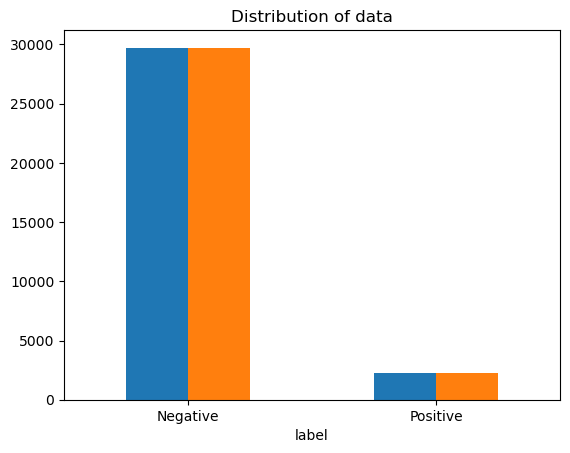

In [12]:
# Plotting the distribution for dataset.
ax = df.groupby('label').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['new']), list(df['label'])

In [13]:
# Creating separate lists for positive and negative texts
positive_texts = [t for t, s in zip(text, sentiment) if s == 0]  # Assuming 0 is Positive
negative_texts = [t for t, s in zip(text, sentiment) if s == 1]  # Assuming 1 is Negative

In [14]:
positive_texts

[['user', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'dysfunct', 'run'],
 ['user',
  'user',
  'thank',
  'lyft',
  'credit',
  'use',
  'caus',
  'offer',
  'wheelchair',
  'van',
  'pdx',
  'disapoint',
  'getthank'],
 ['bihday', 'majesti'],
 ['model', 'love', 'u', 'take', 'u', 'time', 'ur'],
 ['factsguid', 'societi', 'motiv'],
 ['2',
  '2',
  'huge',
  'fan',
  'fare',
  'big',
  'talk',
  'leav',
  'chao',
  'pay',
  'disput',
  'get',
  'allshowandnogo'],
 ['user',
  'camp',
  'tomorrow',
  'user',
  'user',
  'user',
  'user',
  'user',
  'user',
  'user',
  'danni'],
 ['next',
  'school',
  'year',
  'year',
  'exam',
  'think',
  'school',
  'exam',
  'hate',
  'imagin',
  'actorslif',
  'revolutionschool',
  'girl'],
 ['love', 'land', 'allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 ['user', 'user', 'welcom', 'gr8'],
 ['ireland',
  'consum',
  'price',
  'index',
  'mom',
  'climb',
  'previou',
  '0',
  '2',
  '0',
  '5',
  'may',
  'blog',
  'silver',
  'go

In [196]:
negative_texts

[['user',
  'cnn',
  'call',
  'michigan',
  'middl',
  'school',
  'build',
  'wall',
  'chant',
  'tcot'],
 ['comment',
  'australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 ['retweet', 'agre'],
 ['user', 'user', 'lumpi', 'say', 'prove', 'lumpi'],
 ['unbeliev',
  '21st',
  'centuri',
  'need',
  'someth',
  'like',
  'neverump',
  'xenophobia'],
 ['user', 'let', 'fight', 'love', 'peac'],
 ['white',
  'establish',
  'blk',
  'folx',
  'run',
  'around',
  'love',
  'promot',
  'great'],
 ['user',
  'hey',
  'white',
  'peopl',
  'call',
  'peopl',
  'white',
  'user',
  'race',
  'ident',
  'med'],
 ['altright', 'use', 'insecur', 'lure', 'men', 'whitesupremaci'],
 ['user',
  'interest',
  'linguist',
  'address',
  'race',
  'racism',
  'power',
  'raciolinguist',
  'bring'],
 ['user',
  'user',
  'mock',
  'obama',
  'black',
  'user',
  'user',
  'user',
  'user',
  'brexit'],
 ['peopl', 'protest', 'trump', 'republican', 'trump', '

In [197]:
#X=df['new'].values
#Y= df['label'].values

In [179]:
#data_pos = data_pos.apply(lambda x: " ".join([word for word in x if word.isalpha()]) if isinstance(x, list) else x)

In [15]:
# Flatten the nested list of words
positive_words_new = [word for sublist in positive_texts for word in sublist]
negative_words_new = [word for sublist in negative_texts for word in sublist]

In [16]:
from collections import Counter

# Count word frequencies
positive_word_counts = Counter(positive_words_new)
negative_word_counts = Counter(negative_words_new)

# Select the top 10,000 most common words (adjust as needed)
top_positive_words = ' '.join([word for word, count in positive_word_counts.most_common(10000)])
top_negative_words = ' '.join([word for word, count in negative_word_counts.most_common(10000)])


In [18]:
from nltk.tokenize import word_tokenize

In [167]:
#Plot a cloud of words for negative tweets

In [168]:
#!pip install wordcloud

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [21]:
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(top_positive_words)


In [22]:
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(top_negative_words)


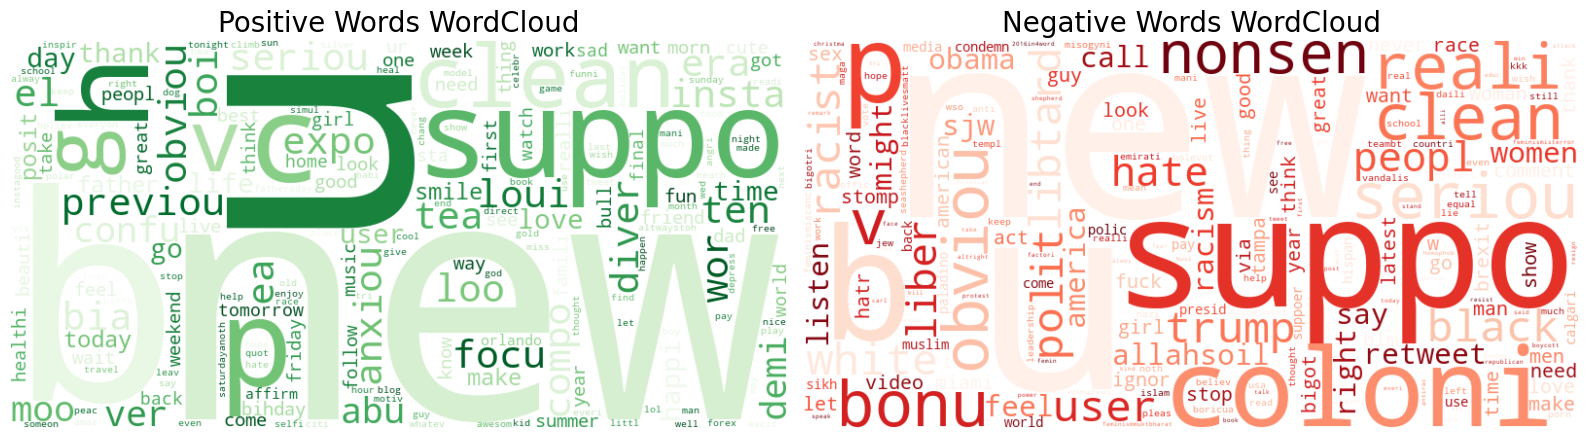

In [23]:
# Plot WordClouds
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Words WordCloud', fontsize=20)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Words WordCloud', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()

In [27]:
# Get the most frequent words
positive_counts = Counter(positive_words_new)
negative_counts = Counter(negative_words_new)
top_positive = positive_counts.most_common(10)  # Top 10 positive words
top_negative = negative_counts.most_common(10)  # Top 10 negative words


In [28]:
print(top_positive)

[('user', 15719), ('love', 3204), ('day', 2838), ('happi', 2093), ('thank', 1537), ('time', 1232), ('get', 1207), ('life', 1163), ('u', 1150), ('go', 1115)]


In [29]:
print(top_negative)

[('user', 1864), ('trump', 217), ('white', 159), ('libtard', 150), ('black', 149), ('like', 144), ('racist', 114), ('polit', 101), ('peopl', 95), ('liber', 93)]


In [93]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y,stratify=Y, test_size=0.2)

In [94]:
X_train

14695    just enjoying the day. #freespirit #hippie #hi...
18188      is defunding aboion and sending you to the #...
13579       coffe go to work ðð   #miercolesbonitos 
2066     salute to all fathers active in they kids live...
2802     confirmation teacher? the youth director is in...
                               ...                        
20341    wow. i really ate the last of the fried chicke...
11593    what makes your little one   today? ad  #mom #...
20594    #beachday   gorilla simulator: you need to do ...
21973    set of 4 moroc... gbp 19.00 get here:  #shop #...
21097    dang i clicked on this girls selfies cause she...
Name: tweet, Length: 25569, dtype: object

In [95]:
X_test

11853     @user have had setup #bbc #iplayer to watch n...
24517    all tickets have been delivered, lets get read...
8732     @user # in other words creditors do not want  ...
12285     @user .@user kill an #animal &amp; market it ...
3057             and destructive socialists #maddow @user 
                               ...                        
24964    #interested in what i do? lets #chat and have ...
7256       @user saturday shooting @user   #beretta @user 
14156    every monday, i tell myself that i will give t...
3236     my "happy things place" âºï¸ all my scuba st...
13962    shout out to @user 4 following me! can't wait ...
Name: tweet, Length: 6393, dtype: object

In [96]:
Y_train

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [97]:
Y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
#cache_data = dict(words_train=train_X, words_test=test_X,
                              #labels_train=train_y, labels_test=test_y)
#with open('preprocessed.pkl', "wb") as f:
    #pickle.dump(cache_data, f)

#print("Wrote preprocessed data to cache file")

In [99]:
#def convert_and_pad(word_dict, sentence, pad=256):
    #NOWORD = 0 # We will use 0 to represent the 'no word' category
    #INFREQ = 1 # and we use 1 to represent the infrequent words, i.e., words not appearing in word_dict
    
    #working_sentence = [NOWORD] * pad
    
    #for word_index, word in enumerate(sentence[:pad]):
        #if word in word_dict:
            working_sentence[word_index] = word_dict[word]
        #else:
            #working_sentence[word_index] = INFREQ
            
    #return working_sentence, min(len(sentence), pad)

#def convert_and_pad_data(word_dict, data, pad=256):
    #result = []
    #lengths = []
    
    #for sentence in data:
        #converted, leng = convert_and_pad(word_dict, sentence, pad)
        #result.append(converted)
        #lengths.append(leng)
        
    #return np.array(result), np.array(lengths)

IndentationError: unexpected indent (864916974.py, line 9)

In [100]:
#train_X, train_X_len = convert_and_pad_data(word_dict, train_X)
#test_X, test_X_len = convert_and_pad_data(word_dict, test_X)

In [101]:
# Remove invalid entries
train_X = [doc for doc in X_train if isinstance(doc, (list, str))]
test_X = [doc for doc in X_test if isinstance(doc, (list, str))]

In [102]:
train_X_new = [" ".join(doc) if isinstance(doc, list) else doc for doc in train_X]
test_X_new = [" ".join(doc) if isinstance(doc, list) else doc for doc in test_X]

In [62]:
# Convert lists of words back into strings
#train_X = [" ".join(doc) for doc in X_train]
#test_X = [" ".join(doc) for doc in X_test]

In [103]:
print("Number of training samples:", len(train_X_new))
print("Number of testing samples:", len(test_X_new))

Number of training samples: 25569
Number of testing samples: 6393


In [ ]:
#Feature extraction or converting the features into numerical values

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [105]:
tfidf_vectorizer = TfidfVectorizer()
    

In [106]:
# Step 2: Fit the vectorizer on training data and transform train_X
train_X_tfidf = tfidf_vectorizer.fit_transform(train_X_new)

# Step 3: Transform test_X using the same vectorizer
test_X_tfidf = tfidf_vectorizer.transform(test_X_new)

In [107]:
train_X_tfidf.shape

(25569, 36035)

In [108]:
train_X_tfidf

<25569x36035 sparse matrix of type '<class 'numpy.float64'>'
	with 293491 stored elements in Compressed Sparse Row format>